Rameez Rosul
Your student ID: 26098805

# Business Objective :
    The data set comprises of data from New york Airbnb. The objective of this coding excercise is to predict 
    the avialablity of the days in a year on the new york properties.THe features 
    #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-null  object 
 13  reviews_per_month               38843 non-null  float64
 14  calculated_host_listings_count  48895 non-null  int64  
 15  availability_365                48895 non-null  int64 
    we wanted to find out how properties will fare in new york .This will help us in Market forcasting and will also get to see     the data vizvalization .
Data source :https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
Attaching dataset with submission 

Following method was used 
Framing the problem 
Define the objective in business terms.
• How will your solution be used?
• What are the current solutions/workarounds (if any)?
• How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
• How should performance be measured?


Data Acquisition
Create a workspace (with enough storage space).
• Get the data.
• Convert the data to a format you can easily manipulate (without changing the data itself).
• Ensure sensitive information is deleted or protected (e.g. anonymized).
• Check the size and type of the data (time series, sample, geographical, etc.)


Data Exploration
Study each attribute and its characteristics:
• Name
• Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
• % of missing values
• Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
• Possibly useful for the task?
• Type of distribution (Gaussian, uniform, logarithmic, etc.)


Data Profiling
Missing Data (%)
• Quantile Statistics
• Descriptive Statistics
• Correlations

Data Preparation
Process of dealing with missing values, The proper methods depend
on the type of data we are working with
The process of using domain knowledge to create features or input variables that
help ML algorithms perform better.
• Feature engineering can be applied to
1. continuous or
2. discrete data

Modelling 
Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random
Forests, neural net, etc.) using standard parameters.
• Measure and compare performance:
• For each model, use N-fold cross-validation and compute the mean and standard deviation of the
performance measure on the N folds.
• Analyze the most significant variables for each algorithm.

Model Fine-Tuning
Fine-tune the hyperparameters using cross-validation.
• Treat your data transformation choices as hyperparameters, especially when you are not
sure about them (e.g., should I replace missing values with zero or with the median value?
Or just drop the rows?).
• Unless there are very few hyperparameter values to explore, prefer random search over grid
search. If training is very long, you may prefer a Bayesian optimization approach

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#Reading the dataset ,dataset is open source . It includes both catergorical and numerical data.
#its got geographical data as well

import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Desktop\newyork airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,19-11-2018,0.10,1,0


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Saving figure attribute_histogram_plots


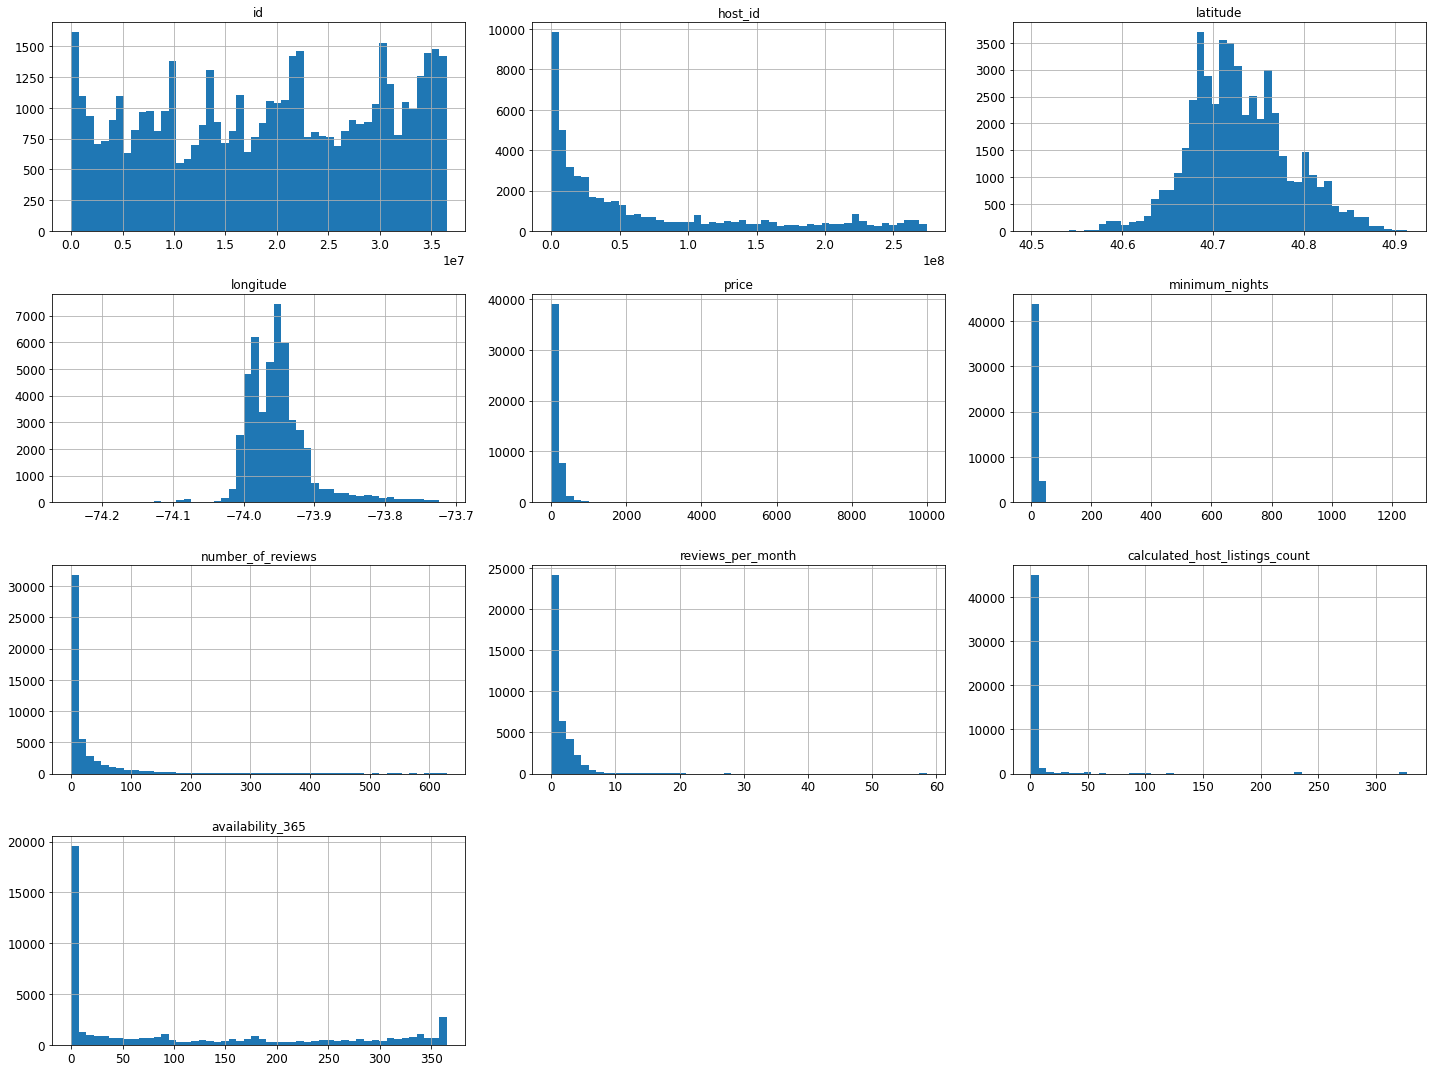

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [6]:
df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

# Handling Missing Data

In [7]:
df=df.drop(['last_review'], axis = 1) 
#df=df.drop(['host_name'], axis = 1) 
#df=df.drop(['name'], axis = 1) 
#df=df.drop(['price_cat'], axis = 1) 

In [8]:
df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [9]:
df = df.dropna() 
  
# To reset the indices  
df = df.reset_index(drop = True) 
  
# Print the dataframe 
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38816,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129.0,1,1,1.00,1,147
38817,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45.0,1,1,1.00,6,339
38818,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235.0,1,1,1.00,1,87
38819,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100.0,1,2,2.00,1,40


In [10]:
df.isnull().sum().sort_values(ascending = False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  float64
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  reviews_per_month               

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:

train_set, test_set = split_train_test(df, 0.2)
len(train_set)

31057

In [15]:
len(test_set)

7764

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [19]:
df_with_id = df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [20]:
df_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [21]:

test_set.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,-73931.72251,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
4,4,-73934.25233,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129
8,8,-73949.65656,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,1.33,4,188
12,12,-73920.33174,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85.0,2,113,0.91,1,333
14,14,-73912.81163,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140.0,2,148,1.20,1,46


In [22]:
#data split for prediction
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
test_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5071,4053517,Two-Bedroom Greenpoint Apartment,3967335,Molly,Brooklyn,Greenpoint,40.72527,-73.95016,Entire home/apt,174.0,2,31,0.54,2,12
6839,5849991,3 bedroom Apt at $249 per Night.,9898029,Anthony,Brooklyn,East Flatbush,40.65041,-73.92574,Entire home/apt,249.0,3,10,0.65,5,156
1930,894015,Boldera: Your Home Away From Home,4622027,Damon And Kent,Brooklyn,Bedford-Stuyvesant,40.68194,-73.92896,Entire home/apt,107.0,2,147,1.89,1,27
3835,2730497,Entire Private Garden Floor of Brownstone,13974214,Jonathan,Brooklyn,Bedford-Stuyvesant,40.68058,-73.93856,Entire home/apt,130.0,3,92,1.45,1,248
8471,7500571,Gorgeous 1 Bedroom in Bed-Stuy,39288710,Audra,Brooklyn,Bedford-Stuyvesant,40.68544,-73.93872,Entire home/apt,102.0,3,64,1.38,1,296


<AxesSubplot:>

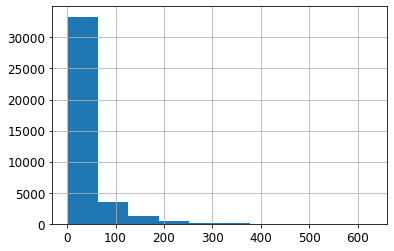

In [24]:
df["number_of_reviews"].hist()

In [25]:
df["popular_cat"] = pd.cut(df["number_of_reviews"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [26]:
df["popular_cat"].value_counts()

5    22634
2     5983
1     5239
4     2971
3     1994
Name: popular_cat, dtype: int64

<AxesSubplot:>

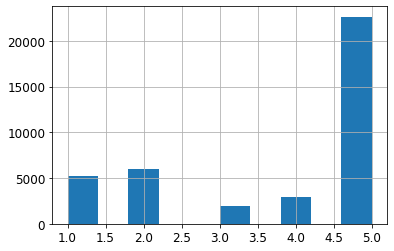

In [27]:
df["popular_cat"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["popular_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [29]:
strat_test_set["popular_cat"].value_counts() / len(strat_test_set)

5    0.583001
2    0.154153
1    0.134965
4    0.076497
3    0.051384
Name: popular_cat, dtype: float64

In [30]:
df["popular_cat"].value_counts() / len(df)

5    0.583035
2    0.154118
1    0.134953
4    0.076531
3    0.051364
Name: popular_cat, dtype: float64

In [31]:
def income_cat_proportions(data):
    return data["popular_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [32]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.134953,0.134965,0.138957,2.967058,0.008783
2,0.154118,0.154153,0.149903,-2.734408,0.023122
3,0.051364,0.051384,0.053574,4.302192,0.039843
4,0.076531,0.076497,0.071732,-6.270176,-0.043958
5,0.583035,0.583001,0.585834,0.480059,-0.005885


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("popular_cat", axis=1, inplace=True)

# Discover and Visualization

In [34]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


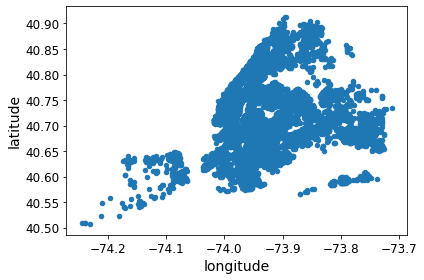

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


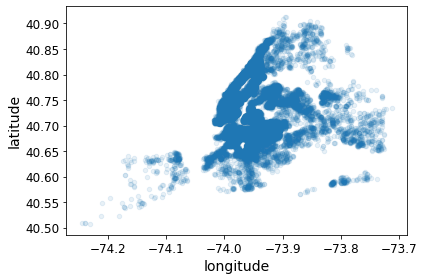

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


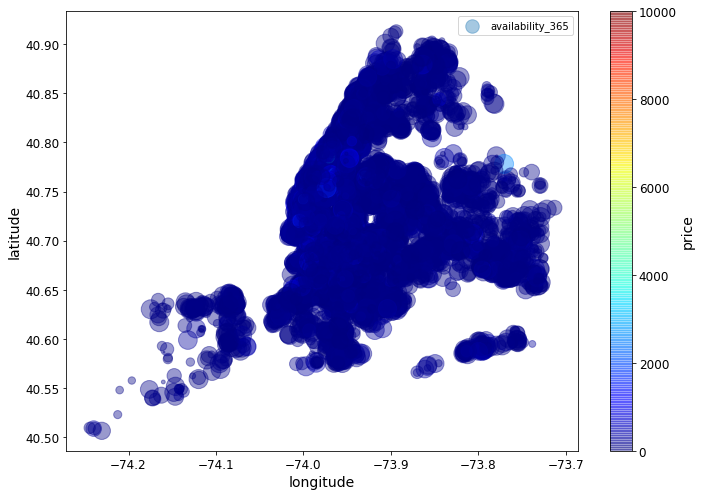

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["availability_365"], label="availability_365", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [38]:
# # Download the California image
# import urllib
# images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
# os.makedirs(images_path, exist_ok=True)
# DOWNLOAD_ROOT = "https://commons.wikimedia.org/wiki/File:Neighbourhoods_New_York_City_Map.PNG"
# filename = "newyork.png"
# print("Downloading", filename)
# url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
# urllib.request.urlretrieve(url, os.path.join(images_path, filename))
# D

In [39]:
BBox = ((df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()))
BBox

(-74.24441999999999, -73.71299, 40.506409999999995, 40.913059999999994)

Saving figure housing_prices_plot


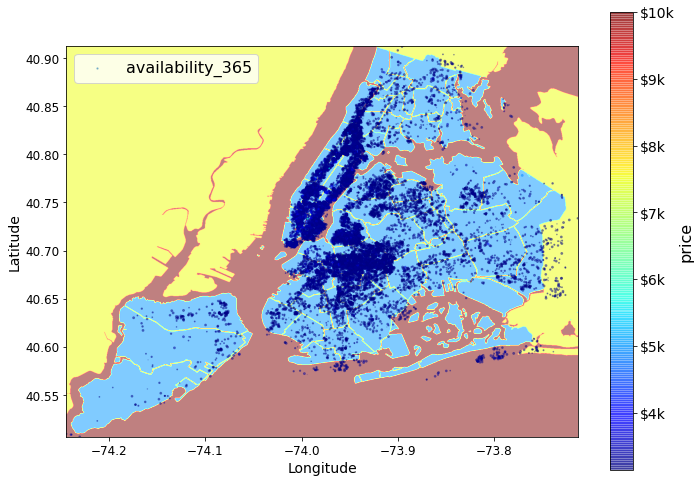

In [40]:
import matplotlib.image as mpimg
california_img=mpimg.imread("924px-Neighbourhoods_New_York_City_Map.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['availability_365']/100, label="availability_365",
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.24441999999999, -73.71299, 40.506409999999995, 40.913059999999994], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('price', fontsize=16)

plt.legend(fontsize=16)
save_fig("housing_prices_plot")
plt.show()

In [41]:
corr_matrix = housing.corr()

In [42]:
corr_matrix['availability_365'].sort_values(ascending=False)

availability_365                  1.000000
number_of_reviews                 0.195903
calculated_host_listings_count    0.187528
reviews_per_month                 0.184696
host_id                           0.156967
longitude                         0.102674
minimum_nights                    0.102249
price                             0.079144
id                                0.007031
latitude                         -0.017537
Name: availability_365, dtype: float64

Saving figure scatter_matrix_plot


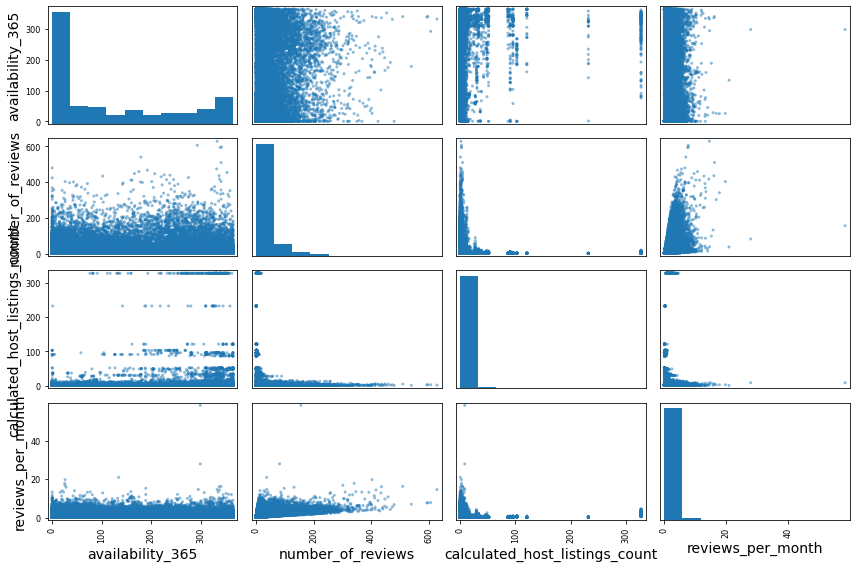

In [43]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["availability_365","number_of_reviews", "calculated_host_listings_count", "reviews_per_month"
            ]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


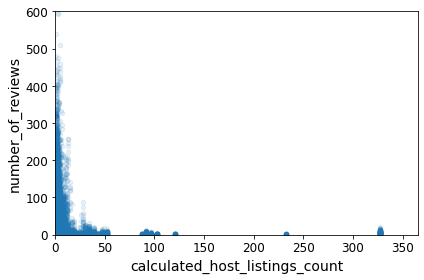

In [44]:
housing.plot(kind="scatter", x="calculated_host_listings_count", y="number_of_reviews",
             alpha=0.1)
plt.axis([0, 365, 0, 600])
save_fig("income_vs_house_value_scatterplot")

In [45]:
housing["booking_possible_per_household"] = 365/housing["minimum_nights"]
#housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.079144
calculated_host_listings_count    0.052029
latitude                          0.036043
minimum_nights                    0.018365
host_id                           0.006551
id                               -0.004772
reviews_per_month                -0.027833
number_of_reviews                -0.033822
booking_possible_per_household   -0.059885
longitude                        -0.154069
Name: price, dtype: float64

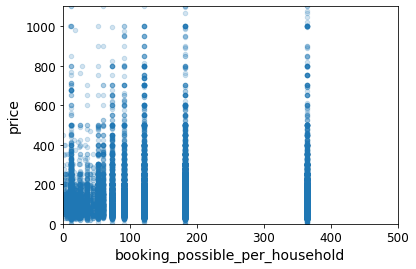

In [47]:
housing.plot(kind="scatter", x="booking_possible_per_household", y="price",
             alpha=0.2)
plt.axis([0, 500, 0, 1100])
plt.show()

In [48]:
housing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booking_possible_per_household
count,3.105600e+04,3.105600e+04,31056.000000,31056.000000,31056.000000,31056.000000,31056.000000,31056.000000,31056.000000,31056.000000,31056.000000
mean,1.807313e+07,6.434037e+07,40.728029,-73.950971,142.127866,5.946838,29.425328,1.379654,5.162545,115.396413,178.942837
std,1.071290e+07,7.592488e+07,0.054944,0.046823,196.767383,17.820552,48.352915,1.696307,26.177217,129.685310,120.864750
min,2.539000e+03,2.571000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.292000
25%,8.675250e+06,7.072569e+06,40.688600,-73.982352,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,91.250000
50%,1.881892e+07,2.842237e+07,40.721650,-73.954720,102.000000,2.000000,9.000000,0.720000,1.000000,56.000000,182.500000
75%,2.760754e+07,1.021102e+08,40.762950,-73.934900,170.000000,4.000000,33.000000,2.030000,2.000000,230.000000,365.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,365.000000


# Prepare the data for Machine Learning algorithms

In [49]:
housing = strat_train_set.drop("availability_365", axis=1) # drop labels for training set
housing_labels = strat_train_set["availability_365"].copy()

In [50]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count


In [51]:
housing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
14707,13954028,Cozy Upper West Side Studio,6571805,Agata,Manhattan,Upper West Side,40.79301,-73.97544,Entire home/apt,124.0,2,28,0.79,2
13327,12972533,Gorgeous Grand 2 BR LES Gem!,71382423,Jules,Manhattan,Lower East Side,40.71772,-73.98882,Entire home/apt,329.0,3,104,2.79,1
32539,30426001,South Harlem Share,228437214,Paul,Manhattan,Harlem,40.80306,-73.95508,Private room,65.0,1,48,6.70,1
14763,13997539,Cozy Garden Apartment Heart of BK!,83611052,Sarah,Brooklyn,Fort Greene,40.69191,-73.97151,Entire home/apt,85.0,7,2,0.06,1
369,115535,Sun-Drenched Hamilton Hts Jewel,567187,Jane,Manhattan,Harlem,40.82399,-73.95328,Private room,65.0,14,35,0.35,1


In [52]:
#using only numerical values for impute
housing_num=housing.drop(['id','name', 'host_id','host_name','neighbourhood_group','neighbourhood','room_type'], axis = 1) 
housing_num

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
14707,40.79301,-73.97544,124.0,2,28,0.79,2
13327,40.71772,-73.98882,329.0,3,104,2.79,1
32539,40.80306,-73.95508,65.0,1,48,6.70,1
14763,40.69191,-73.97151,85.0,7,2,0.06,1
369,40.82399,-73.95328,65.0,14,35,0.35,1
...,...,...,...,...,...,...,...
27766,40.62991,-74.02458,95.0,2,6,0.48,1
12984,40.76494,-73.92752,86.0,4,28,0.74,2
17298,40.67140,-73.99257,75.0,4,7,0.23,1
36188,40.76483,-73.98975,85.0,1,12,4.09,9


In [53]:
housing_num.dtypes

latitude                          float64
longitude                         float64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
dtype: object

In [118]:
#using simple imputer to fill NAs with median values  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [55]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [56]:
imputer.statistics_

array([ 40.72165, -73.95472, 102.     ,   2.     ,   9.     ,   0.72   ,
         1.     ])

In [57]:
housing_num.median().values

array([ 40.72165, -73.95472, 102.     ,   2.     ,   9.     ,   0.72   ,
         1.     ])

In [58]:
X = imputer.transform(housing_num)

In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [60]:
housing_tr.loc[sample_incomplete_rows.index.values]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count


In [61]:
imputer.strategy

'median'

In [62]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [63]:
housing_tr.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
14707,40.79301,-73.97544,124.0,2.0,28.0,0.79,2.0
13327,40.71772,-73.98882,329.0,3.0,104.0,2.79,1.0
32539,40.80306,-73.95508,65.0,1.0,48.0,6.70,1.0
14763,40.69191,-73.97151,85.0,7.0,2.0,0.06,1.0
369,40.82399,-73.95328,65.0,14.0,35.0,0.35,1.0


# preprocess the categorical input feature

In [64]:
#using catergorical value
housing_cat = housing[["neighbourhood_group"]]
housing_cat.head(10)

,neighbourhood_group
14707,Manhattan
13327,Manhattan
32539,Manhattan
14763,Brooklyn
369,Manhattan
7682,Bronx
8597,Brooklyn
10661,Manhattan
4361,Manhattan
17449,Brooklyn


In [65]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.]])

In [66]:
ordinal_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [67]:

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<31056x5 sparse matrix of type '<class 'numpy.float64'>'
	with 31056 stored elements in Compressed Sparse Row format>

In [68]:
housing_cat_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [69]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [70]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # column index
# rooms_ix, bedrooms_ix, population_ix, households_ix = 2,3,4,5

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         population_per_household = X[:, population_ix] / X[:, households_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             return np.c_[X, rooms_per_household, population_per_household,
#                          bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)



In [71]:
# col_names = "price", "minimum_nights", "number_of_reviews", "reviews_per_month","calculated_host_listings_count"
# rooms_ix, bedrooms_ix, population_ix, households_ix ,y= [
#     housing.columns.get_loc(c) for c in col_names] # get the column i

In [72]:
# housing_extra_attribs = pd.DataFrame(
#     housing_extra_attribs,
#     columns=list(housing.columns)+["booking_possible_per_household"],
#     index=housing.index)
# housing_extra_attribs.head()

# build a pipeline for preprocessing
#feature engineering and scaling 

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
housing_num_tr

array([[ 1.18270973, -0.52258746, -0.09212989, ..., -0.02947809,
        -0.34761583, -0.12081483],
       [-0.18762739, -0.80834969,  0.94972622, ...,  1.54232424,
         0.83143529, -0.1590166 ],
       [ 1.36562762, -0.08775046, -0.39198116, ...,  0.38415411,
         3.13648023, -0.1590166 ],
       ...,
       [-1.03068775, -0.88844   , -0.34115891, ..., -0.46379189,
        -0.67775014, -0.1590166 ],
       [ 0.6698116 , -0.82821208, -0.29033666, ..., -0.36038384,
         1.59781852,  0.14659758],
       [-0.11628031, -0.60438636,  0.16706358, ..., -0.42242867,
        -0.67185489, -0.1590166 ]])

In [75]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["neighbourhood_group"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
housing_prepared

array([[ 1.18270973, -0.52258746, -0.09212989, ...,  1.        ,
         0.        ,  0.        ],
       [-0.18762739, -0.80834969,  0.94972622, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.36562762, -0.08775046, -0.39198116, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.03068775, -0.88844   , -0.34115891, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6698116 , -0.82821208, -0.29033666, ...,  1.        ,
         0.        ,  0.        ],
       [-0.11628031, -0.60438636,  0.16706358, ...,  1.        ,
         0.        ,  0.        ]])

In [77]:
housing_prepared.shape

(31056, 12)

here is the old solution based on a DataFrameSelector transformer 

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [79]:
num_attribs = list(housing_num)
cat_attribs = ["neighbourhood_group"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
#        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [80]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [81]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 1.18270973, -0.52258746, -0.09212989, ...,  1.        ,
         0.        ,  0.        ],
       [-0.18762739, -0.80834969,  0.94972622, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.36562762, -0.08775046, -0.39198116, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.03068775, -0.88844   , -0.34115891, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6698116 , -0.82821208, -0.29033666, ...,  1.        ,
         0.        ,  0.        ],
       [-0.11628031, -0.60438636,  0.16706358, ...,  1.        ,
         0.        ,  0.        ]])

In [82]:
#The result is the same as with the ColumnTransformer:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and train a model
#using supervised learning method

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [84]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85.90043484 156.49552983 133.52869137  73.82644707  93.62203898]


In [85]:
print("Labels:", list(some_labels))

Labels: [336, 205, 4, 0, 283]


In [86]:
some_data_prepared

array([[ 1.18270973, -0.52258746, -0.09212989, -0.22148031, -0.02947809,
        -0.34761583, -0.12081483,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.18762739, -0.80834969,  0.94972622, -0.16536443,  1.54232424,
         0.83143529, -0.1590166 ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 1.36562762, -0.08775046, -0.39198116, -0.2775962 ,  0.38415411,
         3.13648023, -0.1590166 ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.65738965, -0.43865281, -0.29033666,  0.05909912, -0.56719994,
        -0.77796949, -0.1590166 ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.74657006, -0.04930711, -0.39198116,  0.45191033,  0.11529318,
        -0.60700707, -0.1590166 ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ]])

In [87]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

120.63972454549345

In [88]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

102.66925122250208

In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [90]:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [92]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [145.43740342 149.1237294  143.93482687 145.49795926 145.89043931
 145.93973299 145.09211578 149.85447262 146.79463126 148.35534223]
Mean: 146.59206531477156
Standard deviation: 1.8155356325933552


In [93]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [122.47569605 121.88596103 119.23998117 121.45327525 121.22561446
 120.8484671  120.88529099 119.76375944 120.876725   119.09458722]
Mean: 120.77493577142062
Standard deviation: 1.0497761185593686


In [94]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [95]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

39.13229342097773

# Fine-tune your model

In [96]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [105.16402271 106.17587732 102.88142627 105.69971247 105.56147146
 104.22885922 106.86939546 106.3065043  103.73879181 104.6163464 ]
Mean: 105.12424074188687
Standard deviation: 1.186698060217988


In [97]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     120.774936
std        1.106561
min      119.094587
25%      120.034936
50%      120.881008
75%      121.396360
max      122.475696
dtype: float64

In [98]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

134.0108510214151

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [101]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [102]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

120.31339032294915 {'max_features': 2, 'n_estimators': 3}
109.34211714445951 {'max_features': 2, 'n_estimators': 10}
105.55750186196092 {'max_features': 2, 'n_estimators': 30}
121.25254309850607 {'max_features': 4, 'n_estimators': 3}
109.52878541827484 {'max_features': 4, 'n_estimators': 10}
105.93503110372818 {'max_features': 4, 'n_estimators': 30}
121.01239940054833 {'max_features': 6, 'n_estimators': 3}
109.76580335286647 {'max_features': 6, 'n_estimators': 10}
105.98533841518304 {'max_features': 6, 'n_estimators': 30}
120.94950655181844 {'max_features': 8, 'n_estimators': 3}
110.05737104340227 {'max_features': 8, 'n_estimators': 10}
106.31404528498871 {'max_features': 8, 'n_estimators': 30}
120.81326995683396 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
109.52891414232296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
120.77562889357836 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
109.63596646423625 {'bootstrap': False, 'max_features': 3, 'n

In [103]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139085,0.036743,0.008073,0.002262,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-14226.669368,-14139.820355,...,-14475.311891,250.292220,12,-3734.066356,-3776.582286,-3.685118e+03,-3762.750055,-3720.337439,-3735.770827,32.249830
1,0.481415,0.050064,0.028482,0.007594,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-11786.249618,-11841.257525,...,-11955.698582,163.046470,5,-2117.811901,-2174.184556,-2.141601e+03,-2142.447924,-2140.584153,-2143.325867,17.969334
2,1.621078,0.144012,0.092006,0.017754,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-11192.717031,-10952.632653,...,-11142.386199,144.119127,1,-1675.611536,-1713.698077,-1.698582e+03,-1688.000318,-1693.814625,-1693.941357,12.515271
3,0.250057,0.038615,0.008665,0.003697,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-14858.588950,-14198.493247,...,-14702.179208,360.642865,18,-3662.175432,-3712.030165,-3.612297e+03,-3656.067105,-3694.703660,-3667.454747,34.436483
4,0.809629,0.054857,0.031817,0.007759,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-12153.742787,-11828.437587,...,-11996.554835,199.537793,6,-2140.591945,-2180.088813,-2.130745e+03,-2147.498388,-2142.267280,-2148.238199,16.823514
5,2.356020,0.100932,0.075991,0.021803,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-11333.134017,-11016.235090,...,-11222.230815,146.498778,2,-1690.243357,-1719.221758,-1.697996e+03,-1681.780941,-1701.966322,-1698.241764,12.562053
6,0.320630,0.026632,0.008775,0.003447,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-14292.553177,-14570.998873,...,-14644.000809,249.541738,16,-3698.789911,-3733.133181,-3.680228e+03,-3616.392142,-3645.501380,-3674.808978,40.688152
7,1.131457,0.059583,0.032298,0.007728,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-12076.226082,-11926.528641,...,-12048.531586,112.242716,9,-2143.755029,-2187.151533,-2.151288e+03,-2104.270408,-2136.668904,-2144.626734,26.628737
8,3.382565,0.088251,0.084238,0.017959,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-11300.846071,-11045.186433,...,-11232.891959,134.636125,3,-1690.167325,-1719.798946,-1.712365e+03,-1677.152637,-1704.752374,-1700.847332,15.379074
9,0.383104,0.041476,0.008367,0.002917,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-14767.960811,-13944.549294,...,-14628.783135,349.016952,15,-3671.891268,-3717.777134,-3.672603e+03,-3641.765220,-3767.047530,-3694.216809,43.763371


In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000262A7E5AA48>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000262A7E5ABC8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

104.77164992785768 {'max_features': 7, 'n_estimators': 180}
107.77443913642841 {'max_features': 5, 'n_estimators': 15}
104.92193923075293 {'max_features': 3, 'n_estimators': 72}
106.7551616404188 {'max_features': 5, 'n_estimators': 21}
104.93363538272618 {'max_features': 7, 'n_estimators': 122}
104.89953190962032 {'max_features': 3, 'n_estimators': 75}
104.8055741512681 {'max_features': 3, 'n_estimators': 88}
104.75401492503826 {'max_features': 5, 'n_estimators': 100}
104.52351578402907 {'max_features': 3, 'n_estimators': 150}
128.23880688865003 {'max_features': 5, 'n_estimators': 2}


In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14946133, 0.1572945 , 0.13941523, 0.09921786, 0.1349247 ,
       0.17228942, 0.12825947, 0.0029891 , 0.00493983, 0.00438286,
       0.00543145, 0.00139424])

In [108]:

# #extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# #cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

In [109]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("availability_365", axis=1)
y_test = strat_test_set["availability_365"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:

final_rmse

103.46793712730106

In [111]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([101.6697009 , 105.23545004])

In [112]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(101.66970089818501, 105.23545004432593)

In [113]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(101.66998371128291, 105.23517681320105)

In [114]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85.90043484, 156.49552983, 133.52869137,  73.82644707,
        93.62203898])

In [115]:
my_model = full_pipeline_with_predictor

In [116]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

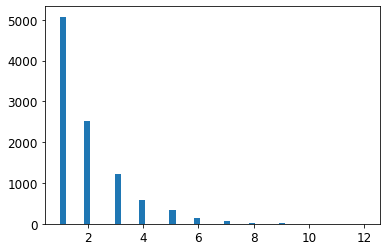

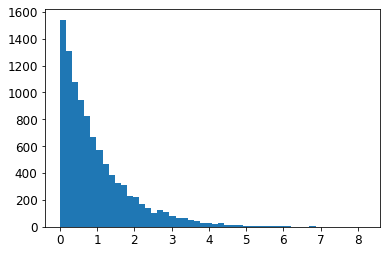

In [117]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()